In [38]:
# Import warnings. Supress warnings (for  matplotlib)
import warnings
warnings.filterwarnings("ignore")

# Importing pandas and sci-kit learn modules
import pandas as pd
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, roc_curve, auc, accuracy_score


## Import Scikit Learn KNN
from sklearn.neighbors import KNeighborsClassifier

## Import visualization modules
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [2]:
## Read in the lending club dataset from final.csv
data = pd.read_csv('/Users/sarita/AnacondaProjects/python/data/final.csv',delimiter=',',na_values='nan')

In [3]:
## Redcuing feature space to only continuous features
continuous_features = data[["loan_amnt", "int_rate", "annual_inc", "installment", "revol_util", "loan_status"]]

In [4]:
## Retireieving initial 5 rows from the continuous_features dataframe.
continuous_features.head()

,loan_amnt,int_rate,annual_inc,installment,revol_util,loan_status
0,5000,10.65,24000.0,162.87,83.7,0
1,2500,15.27,30000.0,59.83,9.4,1
2,2400,15.96,12252.0,84.33,98.5,0
3,10000,13.49,49200.0,339.31,21.0,0
4,5000,7.90,36000.0,156.46,28.3,0


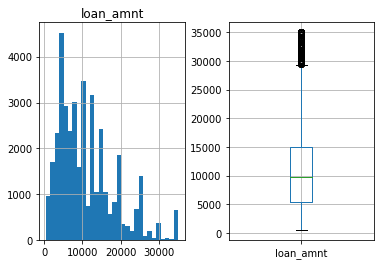

In [5]:
# Creating Histogram and Box Plot of all continuous features to check if there is any outlier in the dataset.
fig, axes = plt.subplots(1, 2)
continuous_features.hist("loan_amnt", bins = 30, ax=axes[0])
continuous_features.boxplot("loan_amnt")
# We do some outliers for loan_amnt in the below box plot

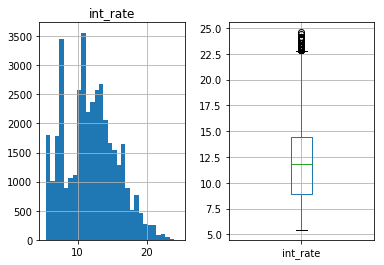

In [6]:
fig, axes = plt.subplots(1, 2)
continuous_features.hist("int_rate", bins = 30, ax=axes[0])
continuous_features.boxplot("int_rate")
# There are outliers for interest rate per the below box plot for int_rate

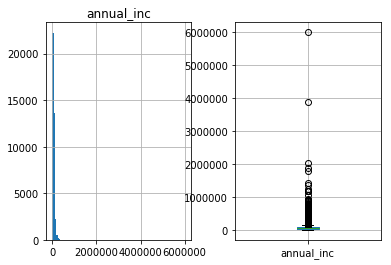

In [7]:
fig, axes = plt.subplots(1, 2)
continuous_features.hist("annual_inc", bins = 100, ax=axes[0])
continuous_features.boxplot("annual_inc")
# Annual Income definitely have outliers (people with very high income)

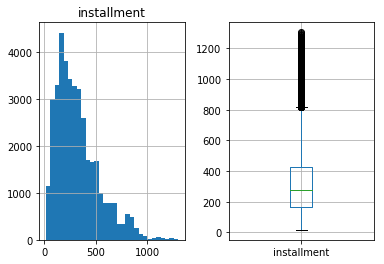

In [8]:
fig, axes = plt.subplots(1, 2)
continuous_features.hist("installment", bins = 30, ax=axes[0])
continuous_features.boxplot("installment")
# Installments also have outliers, values that are greater than 800 per the below graphs.

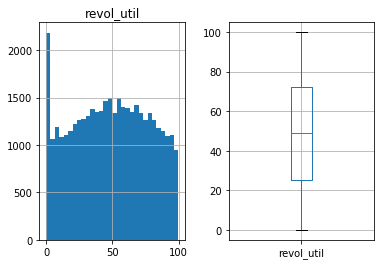

In [9]:
fig, axes = plt.subplots(1, 2)
continuous_features.hist("revol_util", bins = 30, ax=axes[0])
continuous_features.boxplot("revol_util")
# The revolving line utilization rate histogram does not seems to have any outlier.

In [30]:
# Per the above analysis on identifying outliers in about continuous features, we will use the RobustScaler to standardize the loan_amnt, int_rate, annual_inc, and installment features (that has outliers in it) and MinMaxScaler to standardize the revol_util feature.

In [10]:
mm = MinMaxScaler()
rs = RobustScaler()

In [11]:
continuous_features['loan_amnt'] = rs.fit_transform(continuous_features['loan_amnt'].reshape(-1,1))
continuous_features['int_rate'] = rs.fit_transform(continuous_features['int_rate'].reshape(-1,1))
continuous_features['annual_inc'] = rs.fit_transform(continuous_features['annual_inc'].reshape(-1,1))
continuous_features['installment'] = rs.fit_transform(continuous_features['installment'].reshape(-1,1))
continuous_features['revol_util'] = mm.fit_transform(continuous_features['revol_util'].reshape(-1,1))

In [12]:
continuous_features.head()

,loan_amnt,int_rate,annual_inc,installment,revol_util,loan_status
0,-0.500000,-0.213768,-0.833333,-0.444158,0.837838,0
1,-0.760417,0.623188,-0.690476,-0.840025,0.094094,1
2,-0.770833,0.748188,-1.113048,-0.745899,0.985986,0
3,0.020833,0.300725,-0.233333,0.233701,0.210210,0
4,-0.500000,-0.711957,-0.547619,-0.468785,0.283283,0


In [45]:
# 3. (2 point) Create a training set with 80% of cases, and a testing set
# with 20% of cases. (use seed of 12345 so your results will be the
# same as everyone else)

In [13]:
# Seperate input features from target feature
x = continuous_features[["loan_amnt", "int_rate", "annual_inc", "installment", "revol_util"]]
y = continuous_features["loan_status"].as_matrix()

In [14]:
## Split the data into training and test sets into 80:20
x_train, x_test, y_train, y_test = train_test_split(x.values, y, test_size=.2, random_state=12345)

In [15]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((31163, 5), (31163,), (7791, 5), (7791,))

In [66]:
# 4. (2 point) Select the best k by running the kNN classifier for a variety
# of k and computing the accuracy values on the testing set for each
# run.

In [16]:
## We will use the the square root of the training dataset sample size as a starting point for the value of K
import math
math.sqrt(x_train.shape[0])

176.5304506310455

In [17]:
# K = 176
# Create the estimator. Use the weigtage distance to determine the class label.
knn = KNeighborsClassifier(n_neighbors=176, weights='distance')
# Fit the model
knn.fit(x_train, y_train)
## Check accuracy score
print('score: {}%'.format(round(knn.score(x_test,y_test)*100, 2)))
y_pred = knn.predict(x_test)
print('accuracy_score: {}%'.format(round(accuracy_score(y_test, y_pred)*100, 2)))

score: 85.5%
accuracy_score: 85.5%


In [18]:
# K = 150
# Create the estimator. Use the weigtage distance to determine the class label.
knn = KNeighborsClassifier(n_neighbors=150, weights='distance')
# Fit the model
knn.fit(x_train, y_train)
## Check accuracy score
print('score: {}%'.format(round(knn.score(x_test,y_test)*100, 2)))
y_pred = knn.predict(x_test)
print('accuracy_score: {}%'.format(round(accuracy_score(y_test, y_pred)*100, 2)))

score: 85.47%
accuracy_score: 85.47%


In [19]:
# K = 100
# Create the estimator. Use the weigtage distance to determine the class label.
knn = KNeighborsClassifier(n_neighbors=100, weights='distance')
# Fit the model
knn.fit(x_train, y_train)
## Check accuracy score
print('score: {}%'.format(round(knn.score(x_test,y_test)*100, 2)))
y_pred = knn.predict(x_test)
print('accuracy_score: {}%'.format(round(accuracy_score(y_test, y_pred)*100, 2)))

score: 85.46%
accuracy_score: 85.46%


In [20]:
# K = 50
# Create the estimator. Use the weigtage distance to determine the class label.
knn = KNeighborsClassifier(n_neighbors=50, weights='distance')
# Fit the model
knn.fit(x_train, y_train)
## Check accuracy score
print('score: {}%'.format(round(knn.score(x_test,y_test)*100, 2)))
y_pred = knn.predict(x_test)
print('accuracy_score: {}%'.format(round(accuracy_score(y_test, y_pred)*100, 2)))

score: 85.38%
accuracy_score: 85.38%


In [21]:
# K = 20
# Create the estimator. Use the weigtage distance to determine the class label.
knn = KNeighborsClassifier(n_neighbors=20, weights='distance')
# Fit the model
knn.fit(x_train, y_train)
## Check accuracy score
print('score: {}%'.format(round(knn.score(x_test,y_test)*100, 2)))
y_pred = knn.predict(x_test)
print('accuracy_score: {}%'.format(round(accuracy_score(y_test, y_pred)*100, 2)))

score: 85.29%
accuracy_score: 85.29%


In [22]:
# K = 10
# Create the estimator. Use the weigtage distance to determine the class label.
knn = KNeighborsClassifier(n_neighbors=10, weights='distance')
# Fit the model
knn.fit(x_train, y_train)
## Check accuracy score
print('score: {}%'.format(round(knn.score(x_test,y_test)*100, 2)))
y_pred = knn.predict(x_test)
print('accuracy_score: {}%'.format(round(accuracy_score(y_test, y_pred)*100, 2)))

score: 84.61%
accuracy_score: 84.61%


In [23]:
# K = 5
# Create the estimator. Use the weigtage distance to determine the class label.
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
# Fit the model
knn.fit(x_train, y_train)
## Check accuracy score
print('score: {}%'.format(round(knn.score(x_test,y_test)*100, 2)))
y_pred = knn.predict(x_test)
print('accuracy_score: {}%'.format(round(accuracy_score(y_test, y_pred)*100, 2)))

score: 82.95%
accuracy_score: 82.95%


In [24]:
# K = 3
# Create the estimator. Use the weigtage distance to determine the class label.
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
# Fit the model
knn.fit(x_train, y_train)
## Check accuracy score
print('score: {}%'.format(round(knn.score(x_test,y_test)*100, 2)))
y_pred = knn.predict(x_test)
print('accuracy_score: {}%'.format(round(accuracy_score(y_test, y_pred)*100, 2)))

score: 80.84%
accuracy_score: 80.84%


In [25]:
# K = 200
# Create the estimator. Use the weigtage distance to determine the class label.
knn = KNeighborsClassifier(n_neighbors=200, weights='distance')
# Fit the model
knn.fit(x_train, y_train)
## Check accuracy score
print('score: {}%'.format(round(knn.score(x_test,y_test)*100, 2)))
y_pred = knn.predict(x_test)
print('accuracy_score: {}%'.format(round(accuracy_score(y_test, y_pred)*100, 2)))

score: 85.51%
accuracy_score: 85.51%


In [26]:
# K = 250
# Create the estimator. Use the weigtage distance to determine the class label.
knn = KNeighborsClassifier(n_neighbors=250, weights='distance')
# Fit the model
knn.fit(x_train, y_train)
## Check accuracy score
print('score: {}%'.format(round(knn.score(x_test,y_test)*100, 2)))
y_pred = knn.predict(x_test)
print('accuracy_score: {}%'.format(round(accuracy_score(y_test, y_pred)*100, 2)))

score: 85.51%
accuracy_score: 85.51%


In [27]:
# K = 500
# Create the estimator. Use the weigtage distance to determine the class label.
knn = KNeighborsClassifier(n_neighbors=500, weights='distance')
# Fit the model
knn.fit(x_train, y_train)
## Check accuracy score
print('score: {}%'.format(round(knn.score(x_test,y_test)*100, 2)))
y_pred = knn.predict(x_test)
print('accuracy_score: {}%'.format(round(accuracy_score(y_test, y_pred)*100, 2)))

score: 85.5%
accuracy_score: 85.5%


In [28]:
# K = 1000
# Create the estimator. Use the weigtage distance to determine the class label.
knn = KNeighborsClassifier(n_neighbors=1000, weights='distance')
# Fit the model
knn.fit(x_train, y_train)
## Check accuracy score
print('score: {}%'.format(round(knn.score(x_test,y_test)*100, 2)))
y_pred = knn.predict(x_test)
print('accuracy_score: {}%'.format(round(accuracy_score(y_test, y_pred)*100, 2)))

score: 85.51%
accuracy_score: 85.51%


In [ ]:
# Per the above analysis, K=200 and K=1000 gives slightly better accuracy than other K values. However, if we look at the predicted value loan_status using K =1000 and K=200, we only see loan_status=0. See the example below.


In [29]:
# K = 1000
# Create the estimator. Use the weigtage distance to determine the class label.
knn = KNeighborsClassifier(n_neighbors=1000, weights='distance')
# Fit the model
knn.fit(x_train, y_train)
## Check the prediction
y_pred = knn.predict(x_test)
y_pred[y_pred>0].sum()
# Zero 1 prediction

0

In [30]:
# K = 200
# Create the estimator. Use the weigtage distance to determine the class label.
knn = KNeighborsClassifier(n_neighbors=200, weights='distance')
# Fit the model
knn.fit(x_train, y_train)
## Check the prediction
y_pred = knn.predict(x_test)
y_pred[y_pred>0].sum()
# Only two 1 prediction

2

In [217]:
# Therefore, I would go with a K value of 3 or 5, as the model can predict both loan_status 0 and 1. See example below.

In [31]:
# K = 5
# Create the estimator. Use the weigtage distance to determine the class label.
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')
# Fit the model
knn.fit(x_train, y_train)
## Check the prediction
y_pred = knn.predict(x_test)
y_pred[y_pred>0].sum()
# 393 one prediction

393

In [32]:
# K = 3
# Create the estimator. Use the weigtage distance to determine the class label.
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
# Fit the model
knn.fit(x_train, y_train)
## Check the prediction
y_pred = knn.predict(x_test)
y_pred[y_pred>0].sum()
# 604 one prediction

604

In [233]:
# 5. Apply the kNN classifier with k=3 and compute the
# classification matrix, accuracy, recall, and precision.

In [33]:
# K = 3
# Create the estimator. Use the weigtage distance to determine the class label.
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
# Fit the model
knn.fit(x_train, y_train)
## Check accuracy score
print('score: {}%'.format(round(knn.score(x_test,y_test)*100, 2)))
y_pred = knn.predict(x_test)
print('accuracy_score: {}%'.format(round(accuracy_score(y_test, y_pred)*100, 2)))

score: 80.84%
accuracy_score: 80.84%


In [34]:
# Run 10 fold cross validation
cvs = cross_val_score(knn,x.values,y,cv=10)

In [35]:
# Mean Score after running 10 fold cross validation.
print('Mean Score: {}%, Std. Deviation: {}'.format(round((cvs.mean())*100, 2), round((cvs.std())*100, 2)))

Mean Score: 81.15%, Std. Deviation: 0.82


In [36]:
#Confusion Matrix
conf_mat = pd.DataFrame(confusion_matrix(y_test,y_pred), columns = [0, 1], index = [0,1])
print(conf_mat)
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
print('WHERE')
print('tn={}, fp={}, fn={}, tp={}'.format(tn, fp, fn, tp))

      0    1
0  6178  484
1  1009  120
WHERE
tn=6178, fp=484, fn=1009, tp=120


In [37]:
# Precision tells us that of all the samples we classified as true how many are actually true.
# Recall tells us that of all the actual true samples how many did we classify as true.
print('accuracy: {}%'.format(round(accuracy_score(y_test, y_pred)*100, 2)))
print('recall: {}%'.format(round(recall_score(y_test, y_pred)*100, 2)))
print('precision: {}%'.format(round(precision_score(y_test, y_pred)*100, 2)))

accuracy: 80.84%
recall: 10.63%
precision: 19.87%
